In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode
import nbformat
from sklearn import datasets, svm, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
import warnings

In [2]:
# reading the .csv file
df = pd.read_csv('/home/nicholas/repos/ifood_da_challenge/ml_project1_data.csv')

# checking for data types
print(df.dtypes, "\n")

# cheking number o rows and columns
print(df.shape, "(rows, columns)\n")

# cheking the percentege of null values
for column in df.columns:
    percentage = df[column].isnull().mean()
    print(f'{column}: {round(percentage*100, 2)}%')


ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object 

(2240, 29) (rows, columns)

ID: 0.0%
Year_Birth: 0.0%
Education: 0.0%
Marital_Status:

In [3]:
# replacing missing values by the mean
df['Income'].fillna(df['Income'].mean(), inplace=True)

Income


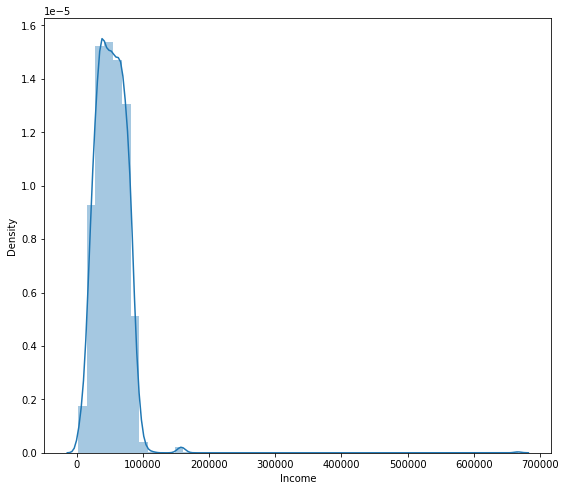

Highest allowed 127360
MntWines


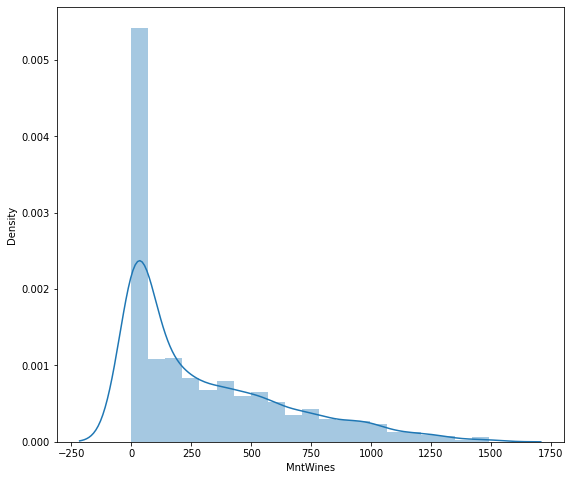

Highest allowed 1313
MntFruits


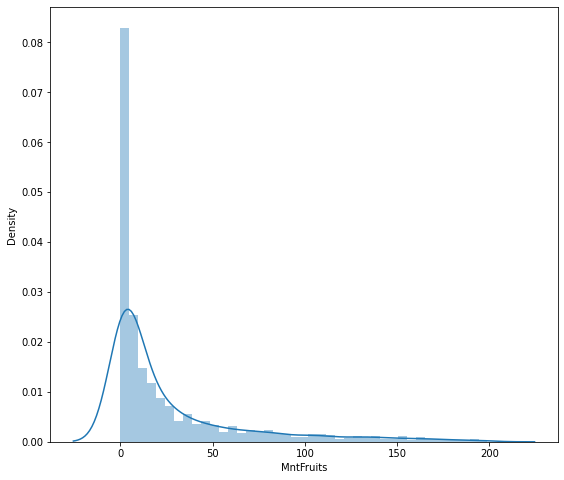

Highest allowed 145
MntMeatProducts


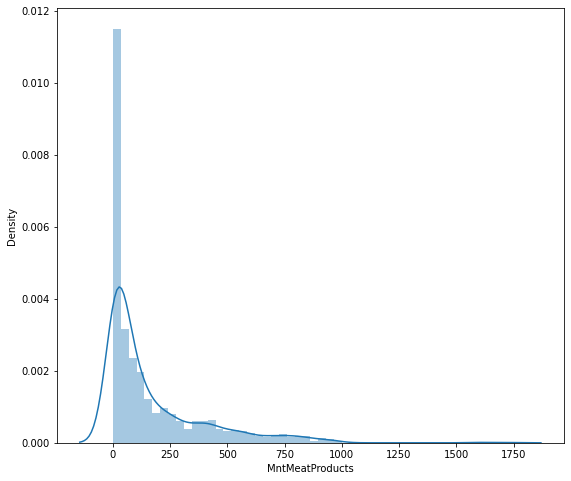

Highest allowed 844
MntFishProducts


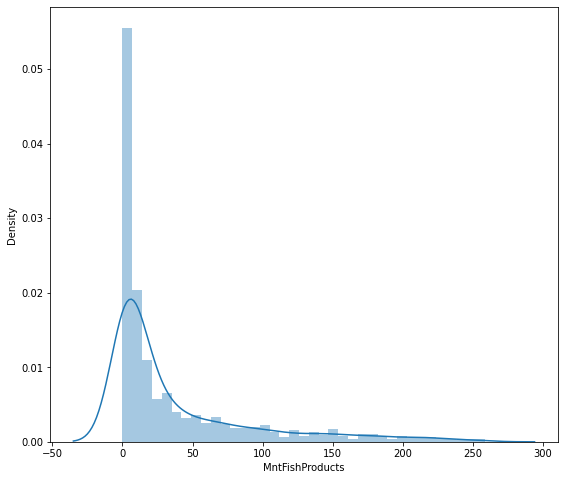

Highest allowed 201
MntSweetProducts


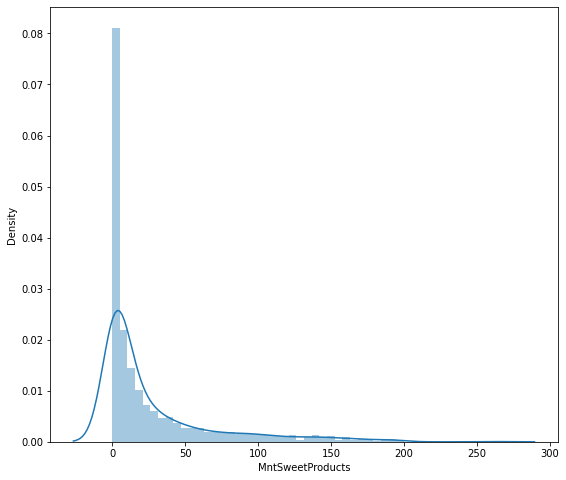

Highest allowed 150
MntGoldProds


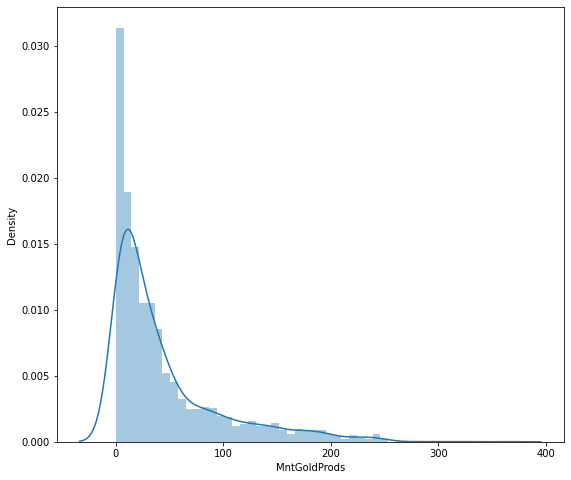

Highest allowed 200
NumDealsPurchases


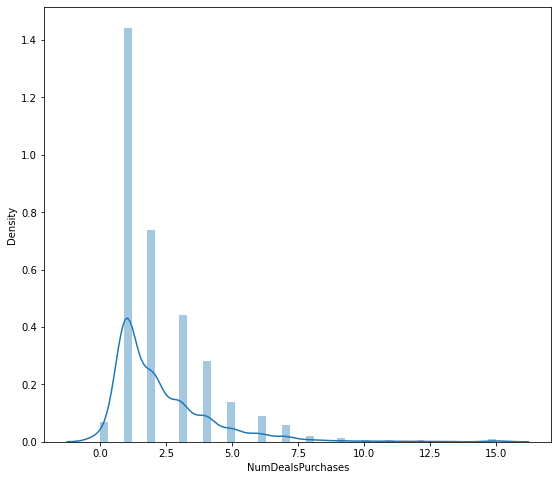

Highest allowed 8
NumWebPurchases


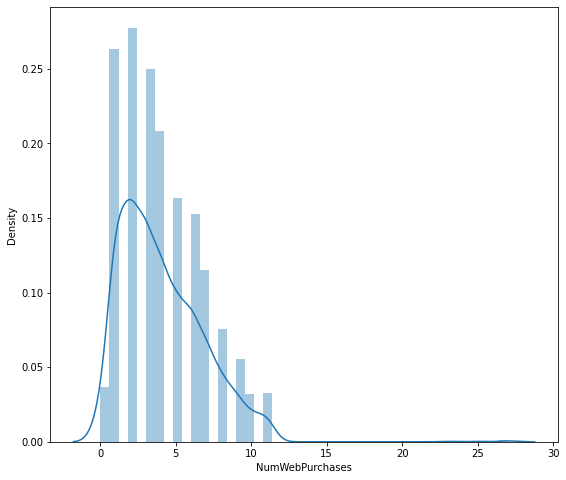

Highest allowed 12
NumCatalogPurchases


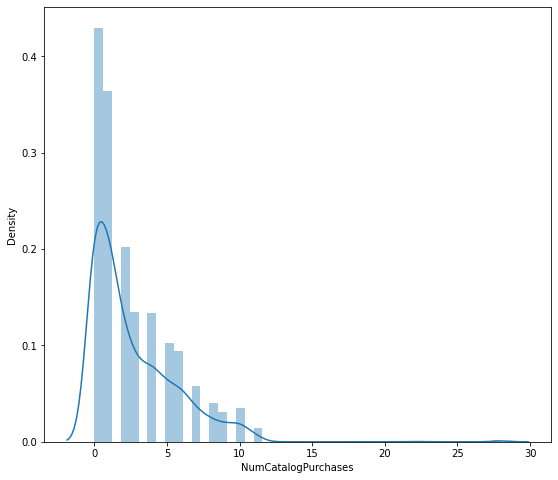

Highest allowed 11
NumStorePurchases


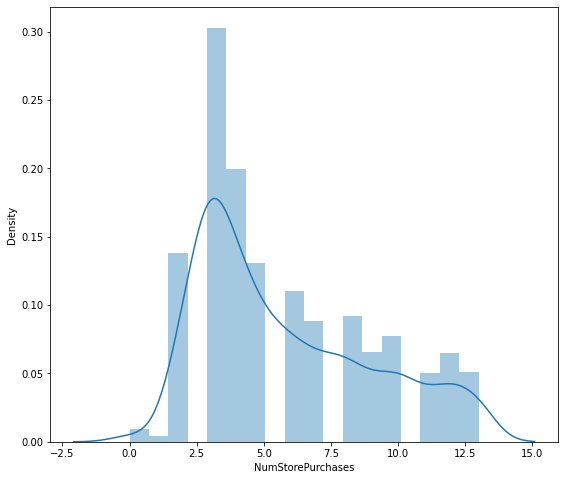

Highest allowed 15
NumWebVisitsMonth


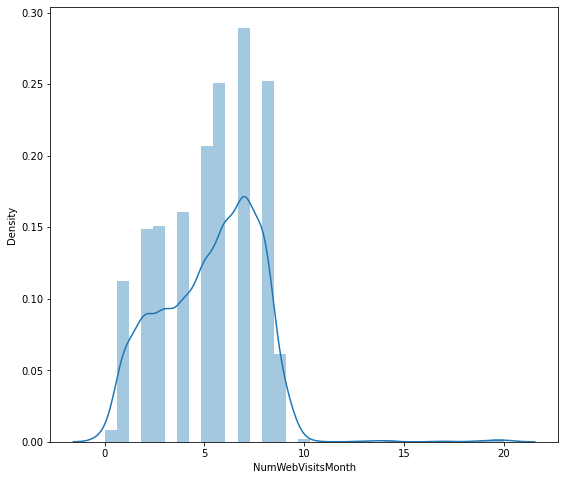

Highest allowed 12


In [4]:
# Looking for outliers

warnings.filterwarnings('ignore')
print('Income')
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.distplot(df['Income'])
plt.show()

print("Highest allowed", int(df['Income'].mean() + 3*df['Income'].std()))

print('MntWines')
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.distplot(df['MntWines'])
plt.show()

print("Highest allowed", int(df['MntWines'].mean() + 3*df['MntWines'].std()))

print('MntFruits')
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.distplot(df['MntFruits'])
plt.show()

print("Highest allowed", int(df['MntFruits'].mean() + 3*df['MntFruits'].std()))

print('MntMeatProducts')
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.distplot(df['MntMeatProducts'])
plt.show()

print("Highest allowed", int(df['MntMeatProducts'].mean() + 3*df['MntMeatProducts'].std()))

print('MntFishProducts')
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.distplot(df['MntFishProducts'])
plt.show()

print("Highest allowed", int(df['MntFishProducts'].mean() + 3*df['MntFishProducts'].std()))

print('MntSweetProducts')
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.distplot(df['MntSweetProducts'])
plt.show()

print("Highest allowed", int(df['MntSweetProducts'].mean() + 3*df['MntSweetProducts'].std()))

print('MntGoldProds')
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.distplot(df['MntGoldProds'])
plt.show()

print("Highest allowed", int(df['MntGoldProds'].mean() + 3*df['MntGoldProds'].std()))

print('NumDealsPurchases')
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.distplot(df['NumDealsPurchases'])
plt.show()

print("Highest allowed", int(df['NumDealsPurchases'].mean() + 3*df['NumDealsPurchases'].std()))

print('NumWebPurchases')
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.distplot(df['NumWebPurchases'])
plt.show()

print("Highest allowed", int(df['NumWebPurchases'].mean() + 3*df['NumWebPurchases'].std()))

print('NumCatalogPurchases')
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.distplot(df['NumCatalogPurchases'])
plt.show()

print("Highest allowed", int(df['NumCatalogPurchases'].mean() + 3*df['NumCatalogPurchases'].std()))

print('NumStorePurchases')
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.distplot(df['NumStorePurchases'])
plt.show()

print("Highest allowed", int(df['NumStorePurchases'].mean() + 3*df['NumStorePurchases'].std()))

print('NumWebVisitsMonth')
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.distplot(df['NumWebVisitsMonth'])
plt.show()

print("Highest allowed", int(df['NumWebVisitsMonth'].mean() + 3*df['NumWebVisitsMonth'].std()))

In [5]:
# removing outliers

df.drop(df[df.Income>113445].index, inplace=True)

df.drop(df[df.MntWines>1315].index, inplace=True)

df.drop(df[df.MntFruits>145].index, inplace=True)

df.drop(df[df.MntMeatProducts>823].index, inplace=True)

df.drop(df[df.MntFishProducts>201].index, inplace=True)

df.drop(df[df.MntSweetProducts>151].index, inplace=True)

df.drop(df[df.MntGoldProds>200].index, inplace=True)

df.drop(df[df.NumDealsPurchases>8].index, inplace=True)

df.drop(df[df.NumWebPurchases>12].index, inplace=True)

df.drop(df[df.NumCatalogPurchases>11].index, inplace=True)

df.drop(df[df.NumStorePurchases>15].index, inplace=True)

df.drop(df[df.NumWebVisitsMonth>12].index, inplace=True)

In [6]:
# Text Normalization

df_str = list(df.select_dtypes(include = 'object').columns.values)
df_numeric = list(df.select_dtypes(include = ['int64', 'float64']).columns.values)
df_columns = list(df.columns.values)

for i in df_str:
    df[i].str.lower()
    df[i].str.strip()
    df[i].replace('[^\w\s]', '', regex=True, inplace=True)

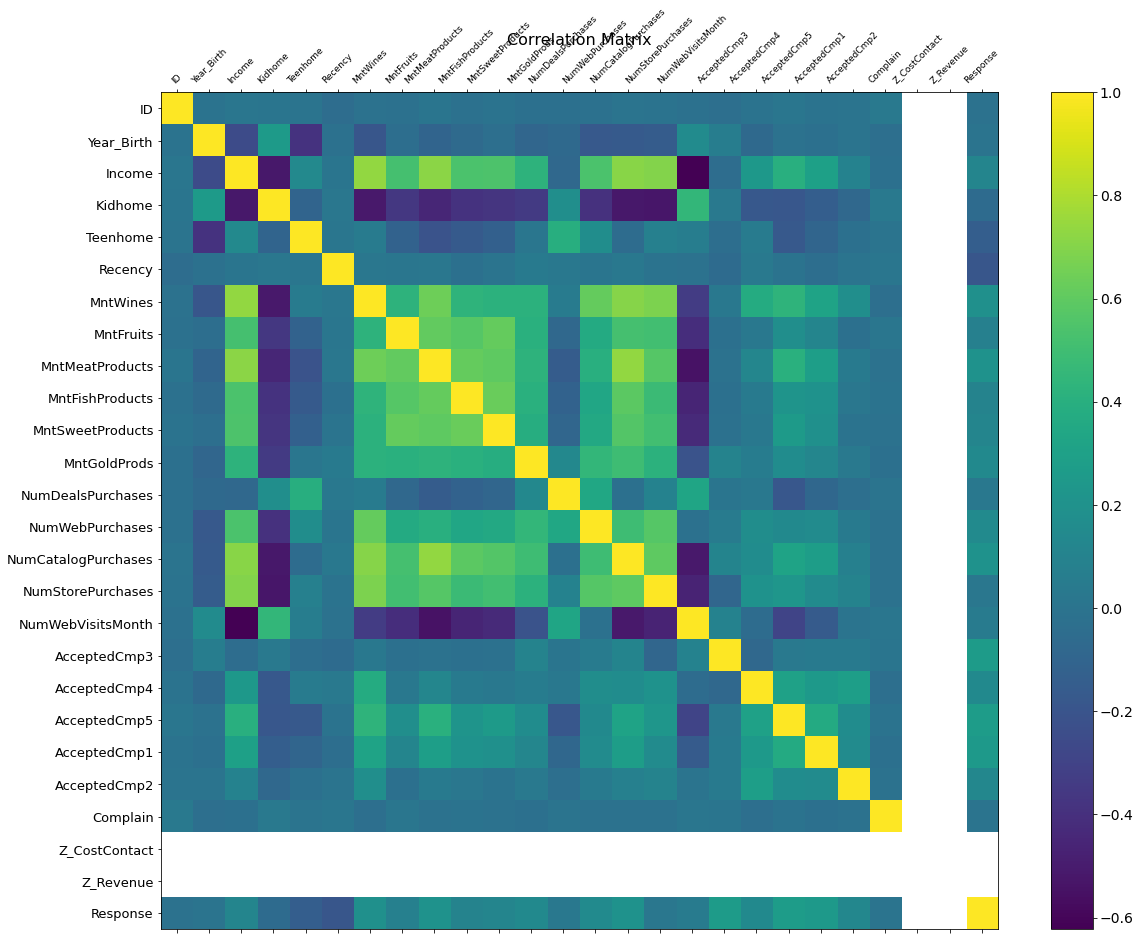

In [7]:
#correlation graph

f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=9, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=13)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [8]:
# removing Z columns

df.drop('Z_CostContact', axis = 1, inplace=True)
df.drop('Z_Revenue', axis = 1, inplace=True)

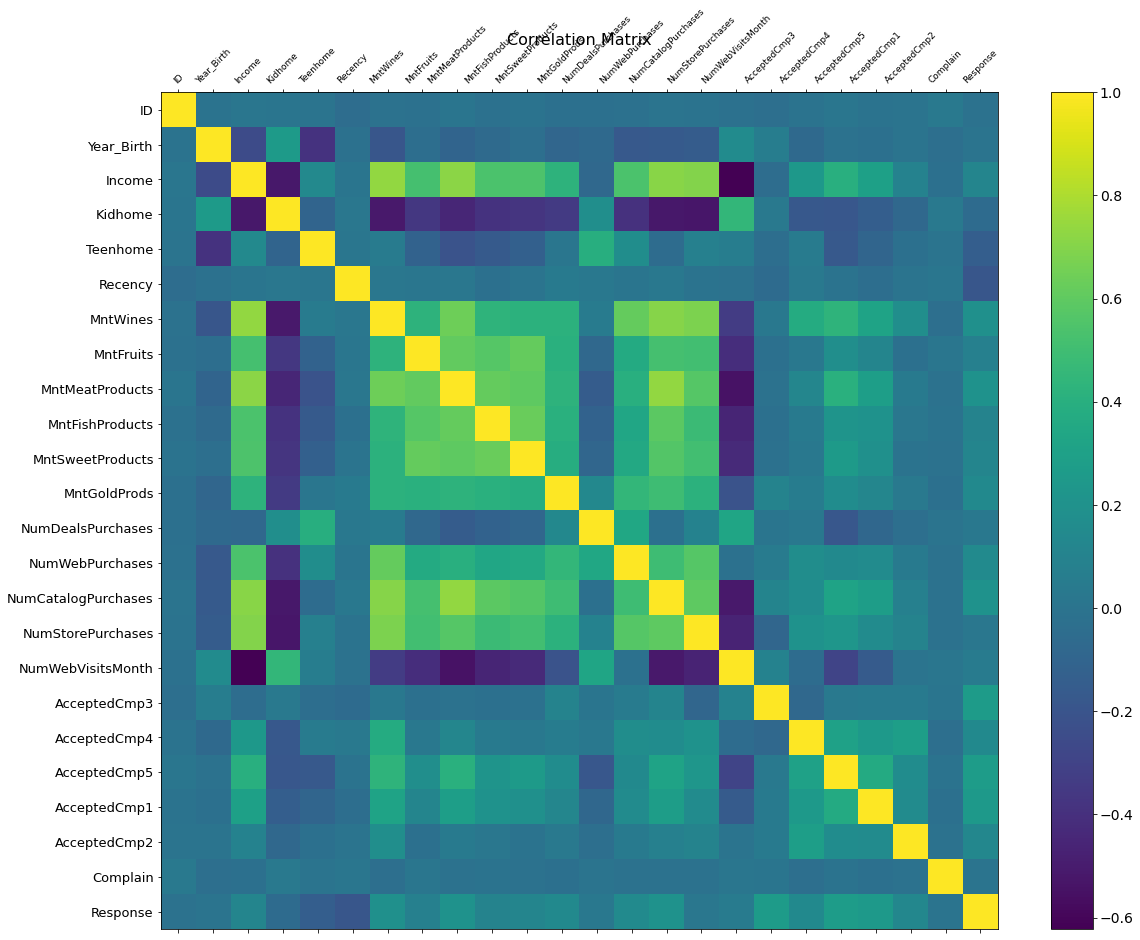

In [9]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=9, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=13)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [10]:
# spliting data

Y = df['Response'].values

features = ['ID',
 'Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Response']

df = pd.get_dummies(df[features])

X_train, X_test, Y_train, Y_test = train_test_split(df, Y, test_size=0.20, random_state = 42)

In [11]:
# using SVC model

clf = svm.SVC(gamma=0.001)

clf.fit(X_train, Y_train) #Testing SVC model
predicted = clf.predict(X_test)

print("SVC accuracy: {0:.4f}".format(metrics.accuracy_score(Y_test, predicted)))

SVC accuracy: 0.8510
